### Imports

In [2]:
# Imports
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Loading Breast Cancer dataset and storing it in a panda dataframe

In [5]:

breast_cancer = load_breast_cancer()
# print(breast_cancer)

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target  # ground class stored in 'target' column/field of the dataframe
# 'malignant' == 0, 'benign' == 1

print(df)
print(breast_cancer.feature_names)
print(len(breast_cancer.feature_names))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [6]:
features = breast_cancer.feature_names
 # ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 # 'mean smoothness' 'mean compactness' 'mean concavity'
 # 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 # 'radius error' 'texture error' 'perimeter error' 'area error'
 # 'smoothness error' 'compactness error' 'concavity error'
 # 'concave points error' 'symmetry error' 'fractal dimension error'
 # 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 # 'worst smoothness' 'worst compactness' 'worst concavity'
 # 'worst concave points' 'worst symmetry' 'worst fractal dimension']

X = df[features]
y = df['target']



In [9]:
# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_breast_cancer(test_ratio, X, y, criterion_string="entropy"):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 3, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print("Confusion Matrix: ")
  print(cm)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_).plot()
  tree.plot_tree(decision_tree_model)

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        40
           1       0.92      0.97      0.95        74

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix: 
[[34  6]
 [ 2 72]]


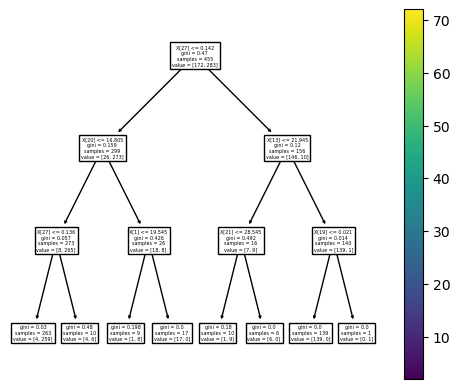

In [10]:
decision_tree_model_breast_cancer(0.2, X, y, "gini")